<a href="https://colab.research.google.com/github/sathwikavalupadasu/Emotion-based-music-recommended-system/blob/main/Music_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch.utils.data import random_split
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms
import torchvision.models as models
from torch.utils.data.dataloader import DataLoader
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_dir = "/content/drive/MyDrive/Emotion"
classes = os.listdir(data_dir+"/train")
classes

['angry', 'happy', 'disgust', 'sad', 'neutral', 'surprise', 'fear']

torch.Size([3, 224, 224]) 0
['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
angry


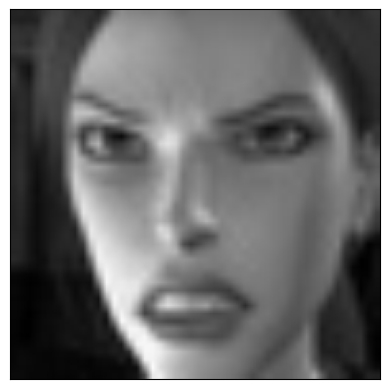

In [ ]:
transforms_ = transforms.Compose([transforms.Resize(224),
                                  transforms.ToTensor(),
                                  transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))])
trainset = ImageFolder(data_dir+"/train", transform=transforms_)
img, label = trainset[5]
print(img.shape, label)
print(trainset.classes)
print(trainset.classes[label])
plt.xticks([])
plt.yticks([])
plt.imshow(img.permute(1, 2, 0)/2 + 0.5);  # Un-normalizing the image while showing

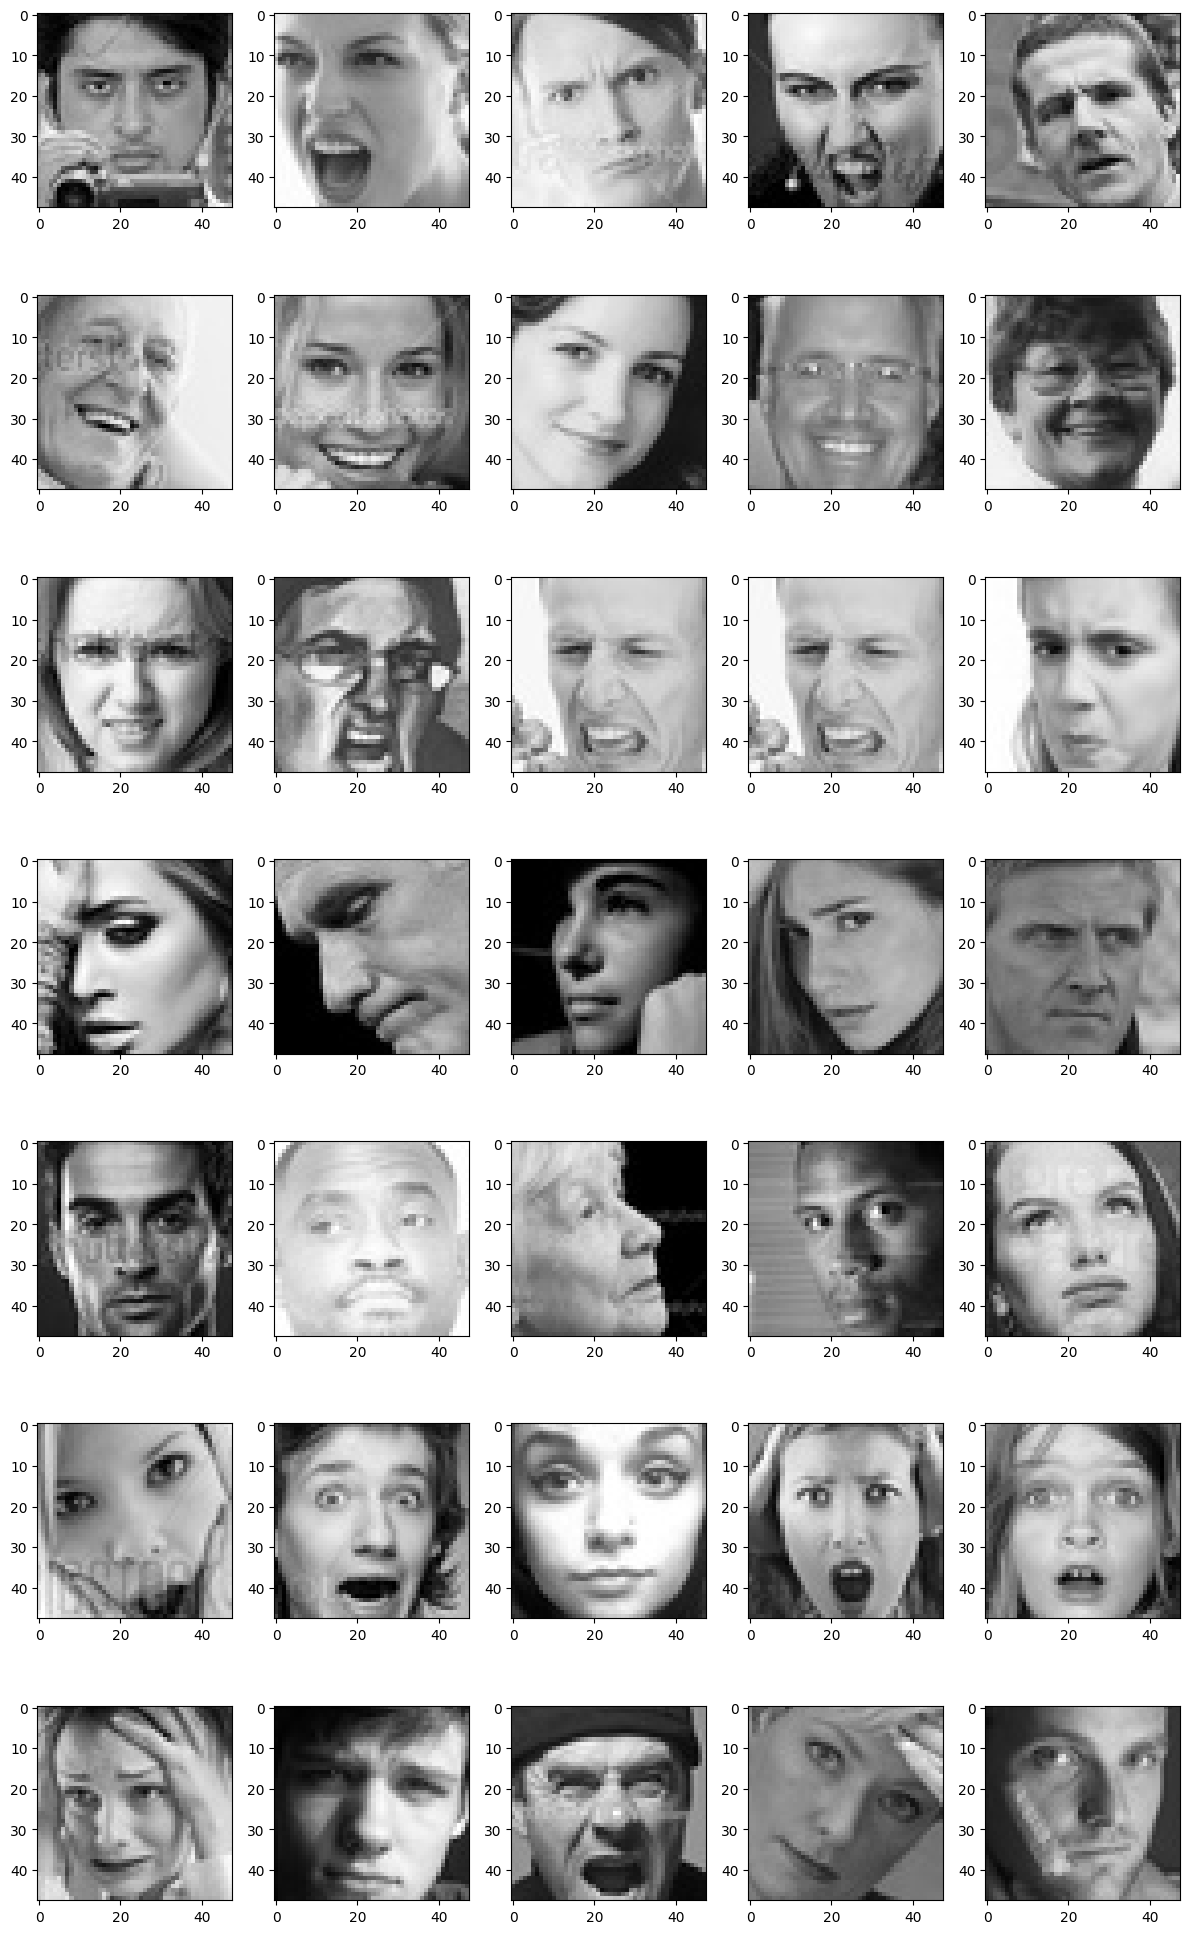

In [ ]:
import numpy as np
import seaborn as sns
from keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import os

# size of the image: 48*48 pixels
pic_size = 48

# input path for the images
base_path = "/content/drive/MyDrive/Emotion"

plt.figure(0, figsize=(12,20))
cpt = 0

for expression in os.listdir(base_path + "/train"):
    for i in range(1,6):
        cpt = cpt + 1
        plt.subplot(7,5,cpt)
        img = load_img(base_path + "/train/" + expression + "/" + os.listdir(base_path + "/train/" + expression)[i], target_size=(pic_size, pic_size))
        plt.imshow(img, cmap="gray")

plt.tight_layout()
plt.show()

In [ ]:
# You don't need to install the `os` module, it's already built-in.

import os

In [ ]:
if not "base_path" in globals():
    raise NameError("Variable 'base_path' is not defined.")

In [ ]:
if not os.path.isdir(base_path):
    raise ValueError("Variable 'base_path' does not contain a valid directory path.")

In [ ]:
print(base_path)

/content/drive/MyDrive/Emotion


In [ ]:
!ls {base_path}

test  train  validation


In [ ]:
import os

In [ ]:
base_path = "/content/drive/MyDrive/Emotion/"

In [ ]:
# count number of train images for each expression

for expression in os.listdir(base_path + "train"):
    print(str(len(os.listdir(base_path + "train/" + expression))) + " " + expression + " images")

3995 angry images
7215 happy images
436 disgust images
4830 sad images
4969 neutral images
3171 surprise images
4097 fear images


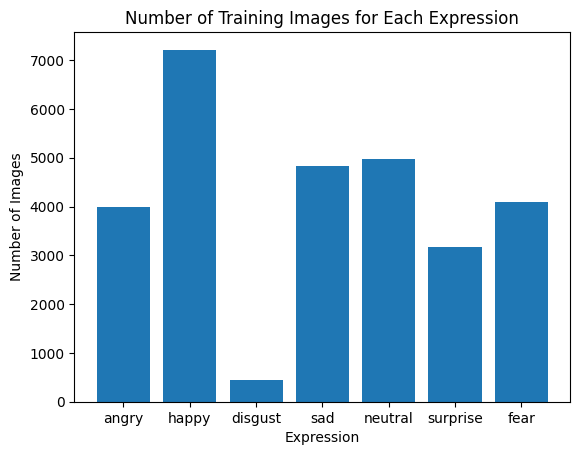

In [ ]:
import matplotlib.pyplot as plt

expression_names = []
image_counts = []

for expression in os.listdir(base_path + "train"):
    expression_names.append(expression)
    image_counts.append(len(os.listdir(base_path + "train/" + expression)))

plt.bar(expression_names, image_counts)
plt.xlabel("Expression")
plt.ylabel("Number of Images")
plt.title("Number of Training Images for Each Expression")
plt.show()

In [ ]:
random_seed = 42
torch.manual_seed(random_seed);

val_size = 2800
train_size = len(trainset) - val_size

train_ds, val_ds = random_split(trainset, [train_size, val_size])
len(train_ds), len(val_ds)

(25913, 2800)

IMPORTING NECESSARY LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.layers import Flatten, Dense
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator , img_to_array, load_img
from tensorflow.keras.applications import MobileNetV2
from keras.applications.mobilenet import MobileNet, preprocess_input
from keras.losses import categorical_crossentropy


TRAININIG DATA

In [ ]:
train_datagen = ImageDataGenerator(
     zoom_range = 0.2,
     shear_range = 0.2,
     horizontal_flip=True,
     rescale = 1./255
)

train_data = train_datagen.flow_from_directory(directory= "/content/drive/MyDrive/Emotion/train",
                                               target_size=(224,224),
                                               batch_size=32,
                                  )


train_data.class_indices

Found 28713 images belonging to 7 classes.


{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

TESTING DATA

In [ ]:

val_datagen = ImageDataGenerator(rescale = 1./255 )

val_data = val_datagen.flow_from_directory(directory= "/content/drive/MyDrive/Emotion/test",
                                           target_size=(224,224),
                                           batch_size=32)
val_data.class_indices

Found 7178 images belonging to 7 classes.


{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

VISUALIZE THE IMAGES IN TRAINING DATA

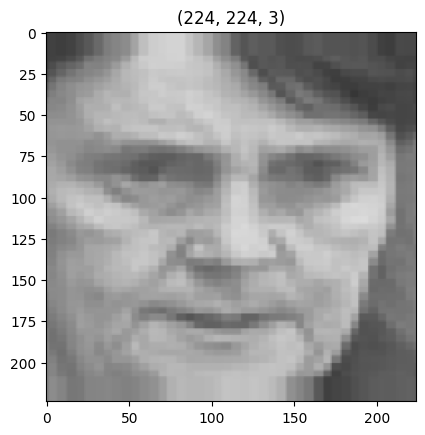

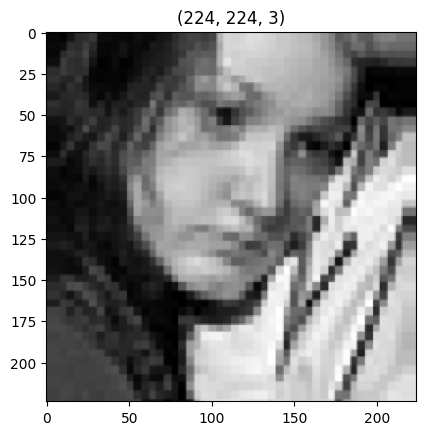

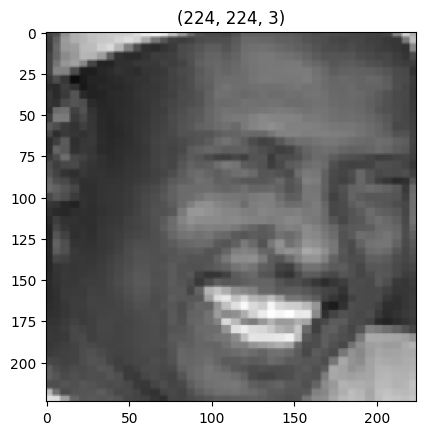

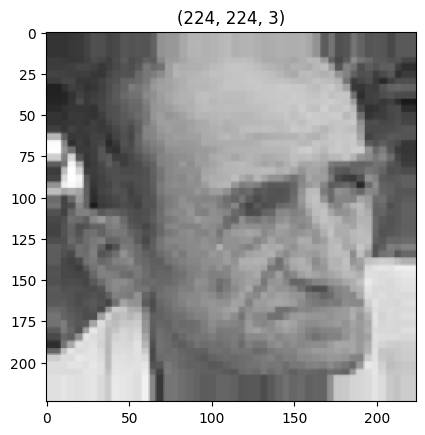

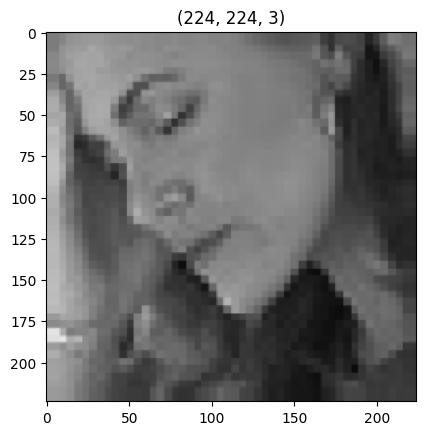

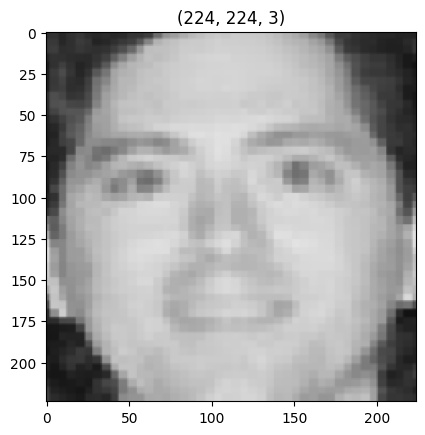

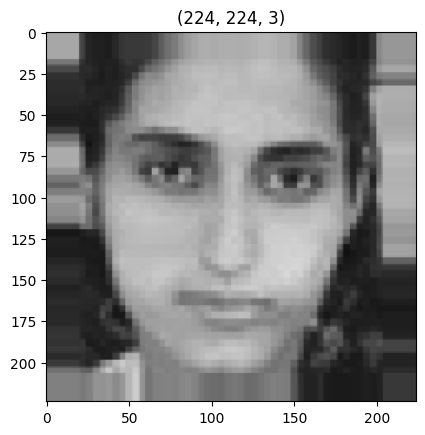

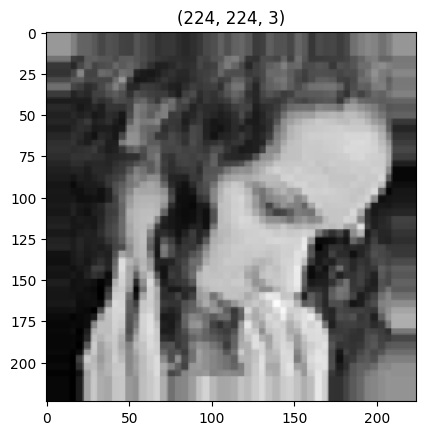

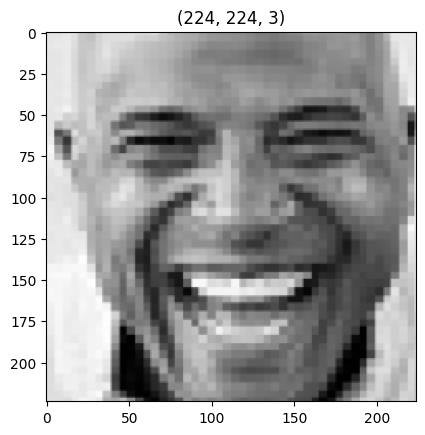

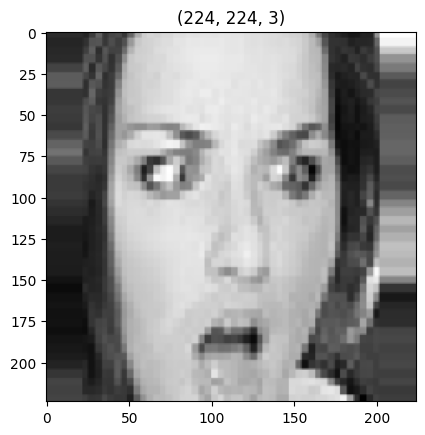

In [ ]:
t_img , label = train_data.next()

def plotImages(img_arr, label):
  count = 0
  for im, l in zip(img_arr,label) :
    plt.imshow(im)
    plt.title(im.shape)
    plt.axis = False
    plt.show()

    count += 1
    if count == 10:
      break

#-----------------------------------------------------------------------------
# function call to plot the images
plotImages(t_img, label)

USING MOBILENET FOR PRETRAINED WEIGHTS

In [ ]:
base_model = MobileNet( input_shape=(224,224,3), include_top= False )

for layer in base_model.layers:
  layer.trainable = False

x = Flatten()(base_model.output)
x = Dense(units=7 , activation='softmax' )(x)

17225924/17225924 [==============================] - 0s 0us/step


CREATING OUR MODEL

In [ ]:
model = Model(base_model.input, x)
model.compile(optimizer='adam', loss= categorical_crossentropy , metrics=['accuracy']  )

TRAINING THE MODEL

In [ ]:

hist = model.fit_generator(train_data,
                           steps_per_epoch= 10,
                           epochs= 20,
                           validation_data= val_data,
                           validation_steps= 10)

<ipython-input-22-47cc1d7a08bb>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(train_data,


Epoch 1/20
10/10 [==============================] - 335s 35s/step - loss: 11.6816 - accuracy: 0.2094 - val_loss: 12.4753 - val_accuracy: 0.2125
Epoch 2/20
10/10 [==============================] - 221s 24s/step - loss: 11.2632 - accuracy: 0.3094 - val_loss: 7.1813 - val_accuracy: 0.3719
Epoch 3/20
10/10 [==============================] - 218s 23s/step - loss: 5.7446 - accuracy: 0.3406 - val_loss: 5.2139 - val_accuracy: 0.4156
Epoch 4/20
10/10 [==============================] - 200s 21s/step - loss: 5.9227 - accuracy: 0.4175 - val_loss: 7.6930 - val_accuracy: 0.2625
Epoch 5/20
 7/10 [====================>.........] - ETA: 29s - loss: 6.8367 - accuracy: 0.3750

SAVING THE BUILT MODEL

In [ ]:
# Save the model in h5 format
model.save('final_model.h5')

Train accuracy v/s Testing accuracy

In [ ]:

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'] , c = "red")
plt.title("training_acc vs testing_acc")
plt.show()

Training Loss v/s Testing Loss

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'] , c = "red")
plt.title("train_loss vs test_loss")
plt.show()

Testing the model using images

In [ ]:
op = dict(zip( train_data.class_indices.values(), train_data.class_indices.keys()))

In [ ]:
# path for the image to see if it predics correct class

path = "/content/drive/MyDrive/Emotion/test/angry/PublicTest_1990985.jpg"
img = load_img(path, target_size=(224,224) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" the image is of {op[pred]}")

# to display the image
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()

In [ ]:
import os
import cv2
import numpy as np
from keras.preprocessing import image
import warnings
warnings.filterwarnings("ignore")
from keras.preprocessing.image import load_img, img_to_array
from keras.models import  load_model
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# load model
model = load_model("final_model.h5")


face_haar_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [ ]:
print(img)

In [ ]:
# Check if the camera is open
if not cap.isOpened():
    print("Error: Camera is not open.")
    exit()

# Check if the camera is reading frames
while True:
    ret, frame = cap.read()
    if not ret:
        print("Error: Camera is not reading frames.")
        break

    # Do something with the frame
    cv2.imshow('LIVE', frame)

    # Press 'q' to quit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the camera
cap.release()
cv2.destroyAllWindows()

In [ ]:
i=0
GR_dict={0:(0,255,0),1:(0,0,255)}

model = tf.keras.models.load_model('final_model.h5')
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

output=[]
cap = cv2.VideoCapture(0)

while (i<=50):
    ret, img = cap.read()
    #gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(img,1.05,5)

    for x,y,w,h in faces:

        face_img = img[y:y+h,x:x+w]

        resized = cv2.resize(face_img,(224,224))
        reshaped=resized.reshape(1, 224,224,3)/255
        predictions = model.predict(reshaped)

        # find max indexed array
        max_index = np.argmax(predictions[0])

        emotions = ('angry', 'disgust', 'fear', 'happy', 'sad', 'neutral', 'surprise')
        predicted_emotion = emotions[max_index]
        output.append(predicted_emotion)



        cv2.rectangle(img,(x,y),(x+w,y+h),GR_dict[1],2)
        cv2.rectangle(img,(x,y-40),(x+w,y),GR_dict[1],-1)
        cv2.putText(img, predicted_emotion, (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
    i = i+1

    cv2.imshow('LIVE', img)
    key = cv2.waitKey(1)
    if key == 27:
        cap.release()
        cv2.destroyAllWindows()
        break
print(output)
cap.release()
cv2.destroyAllWindows()
final_output1 = st.mode(output)

In [ ]:
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time


In [ ]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes


In [ ]:
# initialize the Haar Cascade face detection model
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))


In [ ]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data)
  # grayscale img
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  print(gray.shape)
  # get face bounding box coordinates using Haar Cascade
  faces = face_cascade.detectMultiScale(gray)
  # draw face bounding box on image
  for (x,y,w,h) in faces:
      img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  # save image
  cv2.imwrite(filename, img)

  return filename

In [ ]:
try:
  filename = take_photo('photo.jpg')
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;

    var pendingResolve = null;
    var shutdown = false;

    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }

    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }

    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);

      const modelOut = document.createElement('div');
      modelOut.innerHTML = "Status:";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);

      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);

      const instruction = document.createElement('div');
      instruction.innerHTML =
          '' +
          'When finished, click here or on the video to stop this demo';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };

      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);

      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();

      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }

      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }

      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;

      return {'create': preShow - preCreate,
              'show': preCapture - preShow,
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)

def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [ ]:
# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    img = js_to_image(js_reply["img"])

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    # grayscale image for face detection
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # get face region coordinates
    faces = face_cascade.detectMultiScale(gray)
    # get face bounding box for overlay
    for (x,y,w,h) in faces:
      bbox_array = cv2.rectangle(bbox_array,(x,y),(x+w,y+h),(255,0,0),2)

    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes